In [181]:
%config InlineBackend.rc = {"figure.dpi": 72, 'figure.figsize': (6.0, 4.0)}
%matplotlib inline

import abtem
import ase
import matplotlib.pyplot as plt
import numpy as np

abtem.config.set({"local_diagnostics.progress_bar": True});

# Visualizations

In [182]:
from ase.build import graphene

atoms = ase.build.mx2(vacuum=2)
atoms = abtem.orthogonalize_cell(atoms) * (3, 2, 1)

[########################################] | 100% Completed | 110.78 ms


## Adjusting individual elements

In [183]:
wave = abtem.PlaneWave(energy=80e3, sampling=0.05)

exit_wave = (
    wave.multislice(atoms).apply_ctf(defocus=20, Cs=np.linspace(0, 1e7, 4)).compute()
)

measurements = exit_wave.intensity()

[########################################] | 100% Completed | 109.85 ms


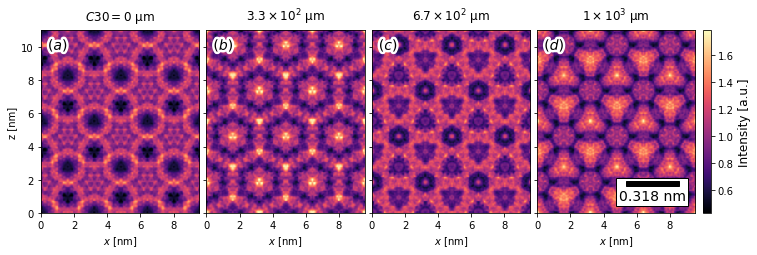

In [184]:
fig, axes = measurements.show(
    explode=True,
    figsize=(12, 12),
    title=False,
    cbar=True,
    common_color_scale=True,
    cmap="magma",
)

abtem.visualize.add_panel_labels(axes, prop={"size": 14})

abtem.visualize.set_titles(axes, measurements, ".2g", units="um")

abtem.visualize.set_xlabels(axes, measurements, units="nm")

abtem.visualize.set_ylabels(axes, measurements, units="nm", label="z [nm]")

abtem.visualize.set_extent(axes, measurements, units="nm")

abtem.visualize.add_sizebar(
    ax=axes[-1],
    measurements=measurements,
    # size=0.3,
    fontproperties={"size": 14},
    formatting=".3f",
    units="nm",
    size_vertical=0.3,
    sep=3,
    pad=0.2,
)

abtem.visualize.set_colorbars(
    axes=axes[-1],
    measurements=measurements,
    label="Intensity [a.u.]",
    fontsize=12
    # size=0.3,
    # fontproperties={"size": 14},
    # formatting=".3f",
    # units="nm",
    # size_vertical=.2,
    # sep=3,
    # pad=.2
);

## Exploded plot with two dimensions

In [180]:
from ase.build import graphene

wave = abtem.PlaneWave(energy=80e3, sampling=0.05)

atoms = graphene(vacuum=2)
atoms = abtem.orthogonalize_cell(atoms)

exit_wave = wave.multislice(atoms)

focal_spread = 30
defocus_distribution = abtem.distributions.gaussian(
    center=0.0,
    standard_deviation=focal_spread,
    num_samples=101,
    sampling_limit=2,
)

images = (
    exit_wave.apply_ctf(defocus=defocus, Cs=Cs)
    .apply_ctf(defocus=defocus_distribution)
    .sum(0)
    .compute()
)

[########################################] | 100% Completed | 435.49 ms


In [ ]:
fig, axes = images.show(
    explode=True, title=True, axes_pad=0.05, figsize=(14, 16), common_color_scale=True
)

for ax in axes:
    ax.set_xticks([])
    ax.set_xlabel("")
    ax.set_yticks([])
    ax.set_ylabel("")

abtem.visualize.set_row_titles(axes, images, units="um", fontsize=11, pad=-2)
abtem.visualize.set_column_titles(axes, images, units="nm", fontsize=11)

In [5]:
projected_potential_xy = (
    abtem.Potential(atoms, sampling=0.05, plane="xy").project().compute()
)
projected_potential_xz = (
    abtem.Potential(atoms, sampling=0.05, plane="xz").project().compute()
)

[########################################] | 100% Completed | 111.92 ms
[########################################] | 100% Completed | 225.26 ms


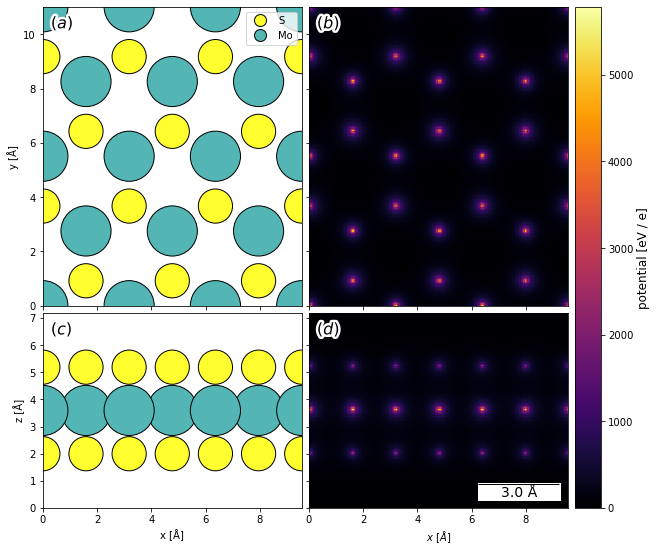

In [7]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10, 10))

axes = ImageGrid(fig, 111, (2, 2), cbar_mode="single", axes_pad=0.1)

abtem.show_atoms(
    atoms,
    tight_limits=True,
    show_cell=False,
    show_periodic=True,
    legend=True,
    scale=0.6,
    ax=axes[0],
)

abtem.show_atoms(
    atoms,
    tight_limits=True,
    show_cell=False,
    show_periodic=True,
    scale=0.6,
    ax=axes[2],
    plane="xz",
)

projected_potential_xy.show(ax=axes[1], cmap="inferno", cbar=True)
projected_potential_xz.show(ax=axes[3], cmap="inferno", cbar=True)

abtem.visualize.add_sizebar(
    ax=axes[3],
    measurements=projected_potential_xy,
    size=3,
    fontproperties={"size": 14},
    formatting=".1f",
)

abtem.visualize.add_panel_labels(
    axes,
    prop={"size": 16},
)

In [173]:
defocus = np.linspace(-50, 50, 7)
Cs = np.linspace(0, 400000, 7)

[########################################] | 100% Completed | 435.93 ms


In [79]:
%matplotlib inline

In [175]:
abtem.config.set({"visualize.use_tex": True})

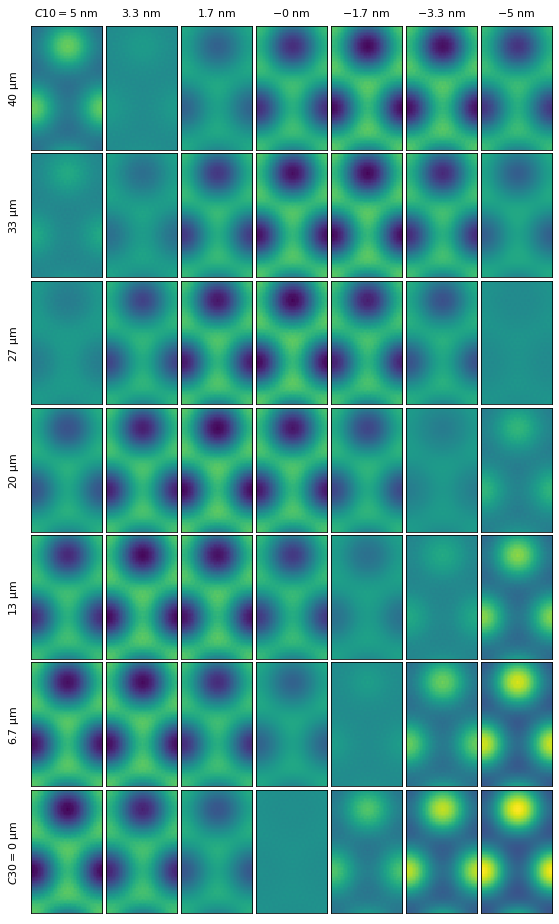

## Interactive visualizations

*ab*TEM allows the creation of basic interactive visualizations. The interactive visualization engine is based on the ensemble system, see our appendix on ensembles here. To run the interactive visualizations, ipympl have to be enabled. See here for install instructions.


In [9]:
%matplotlib ipympl

We create an ensemble probe wave functions by specifying a list of values using 

and compute it to obtain `Waves` represented by a multidimensional array.

In [10]:
semiangle_cutoff = np.linspace(20, 70, 10)
defocus = np.linspace(0, 200, 10)
Cs = np.linspace(0, 1e6, 10)

probe = abtem.Probe(
    gpts=256,
    extent=20,
    energy=80e3,
    semiangle_cutoff=semiangle_cutoff,
    defocus=defocus,
    Cs=Cs,
    soft=True,
)

probe_ensemble = probe.build().complex_images().compute()

[########################################] | 100% Completed | 548.86 ms


The resulting ensemble of probes has 

In [11]:
probe_ensemble.axes_metadata

type           label                    coordinates
-------------  -----------------------  -----------------------------
ParameterAxis  semiangle cutoff [mrad]  20.00 25.56 ... 70.00
ParameterAxis  C10 [Å]                  -0.00 -22.22 ... -200.00
ParameterAxis  C30 [Å]                  0.00 111111.11 ... 1000000.00
RealSpaceAxis  x [Å]                    0.00 0.08 ... 19.92
RealSpaceAxis  y [Å]                    0.00 0.08 ... 19.92

In [12]:
app = probe_ensemble.interact(cbar=True)
app

AppLayout(children=(VBox(children=(SelectionSlider(description='semiangle cutoff [mrad]', options=('20.000', '…

### Interactive visualization with lazy ensembles

In this example, we create an interactive visualization for applying a CTF to an HRTEM exit wave with several different ensemble parameters. The ensemble will be too large to keep in memory hence changing indices 

We start by calculating the an exit wave for plane wave illumination of MoS2. We compute the exit wave, then we make the exit wave lazy. This means that any additional transformations on the exit wave are lazily applied, however, the the multislice algorithm does not have to be run.

In [7]:
wave = abtem.PlaneWave(energy=100e3, sampling=0.05)

atoms = ase.build.mx2(vacuum=2)
atoms = abtem.orthogonalize_cell(atoms)

exit_wave = wave.multislice(atoms).compute().ensure_lazy()

[########################################] | 100% Completed | 1.41 ss


In [24]:
semiangle_cutoff = np.linspace(20, 60, 10)
defocus = np.linspace(0, 200, 50)
Cs = np.linspace(0, 1e6, 50)
focal_spread = np.linspace(0, 50, 10)
angular_spread = np.linspace(0, 20, 10)

ctf = abtem.CTF(
    energy=exit_wave.energy,
    semiangle_cutoff=semiangle_cutoff,
    defocus=defocus,
    Cs=0,
    focal_spread=focal_spread,
    angular_spread=angular_spread,
)

images = exit_wave.ensure_lazy().apply_ctf(ctf).intensity().tile((3, 2))
ctf_profiles = ctf.profiles()

dask.array<_make_profile, shape=(50, 10, 10, 10, 5, 960), dtype=float32, chunksize=(9, 9, 9, 9, 5, 960), chunktype=numpy.ndarray>


In [22]:
ctf_profiles.compute()

[########################################] | 100% Completed | 2.20 sms


In [9]:
images.array

dask.array<concatenate, shape=(50, 50, 10, 10, 10, 192, 222), dtype=float32, chunksize=(5, 5, 5, 4, 4, 64, 111), chunktype=numpy.ndarray>

We note that there is an overhead to sending large computational graphs to the dask scheduler, hence, although the *ab*

In [11]:
from abtem.interact import interact

In [32]:
import warnings

warnings.filterwarnings("error")

In [25]:
interact(
    [images, ctf_profiles],
    indexing_axes=[(0, 1, 2, 3, 4), (0, 1, 2, 3, 4)],
    continuous_update=False,
)

[########################################] | 100% Completed | 473.99 ms


AppLayout(children=(VBox(children=(SelectionSlider(continuous_update=False, description='C10 [Å]', options=('-…

In [10]:
ctf_profiles.interact(interact_axes=(0, 1, 2, 3, 4), continuous_update=True)

AppLayout(children=(VBox(children=(SelectionSlider(description='C10 [Å]', options=('-0.000', '-4.082', '-8.163…

### Integration of ensemble axes

In [10]:
atoms = ase.build.mx2(vacuum=2)

atoms = abtem.orthogonalize_cell(atoms)

atoms = atoms * (5, 3, 1)

In [120]:
defocus = np.linspace(0, 200, 10)


potential = abtem.Potential(atoms)

probe = abtem.Probe(energy=80e3, semiangle_cutoff=20, defocus=defocus, sampling=0.05)

detector = abtem.SegmentedDetector(
    inner=0, outer=200, nbins_azimuthal=20, nbins_radial=100
)

scan = abtem.GridScan(
    start=(0, 0), end=(1 / 5, 1 / 3), fractional=True, potential=potential
)

measurements = probe.scan(potential, scan=scan, detectors=detector).compute()

[########################################] | 100% Completed | 13.41 s


In [121]:
integrated_images = measurements.to_images().interpolate(0.1)

In [138]:
plt.close()
abtem.interact.interact(m.tile((5, 3)), integration_axes=(1, 2), indexing_axes=(0,))

AppLayout(children=(VBox(children=(SelectionSlider(description='C10 [Å]', options=('-0.000', '-22.222', '-44.4…